In [1]:
# import necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data set
df=pd.read_csv("D:/Datatrained projects/data/abalone.csv")
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1142,M,0.575,0.445,0.170,1.0225,0.5490,0.2175,0.228,9
3848,F,0.675,0.535,0.220,1.6040,0.6175,0.4255,0.453,14
2775,I,0.585,0.460,0.145,0.8465,0.3390,0.1670,0.295,10
2557,I,0.390,0.295,0.100,0.2790,0.1155,0.0590,0.080,7
1136,F,0.575,0.460,0.145,0.9945,0.4660,0.2290,0.265,7


In [3]:
# check the data dimension
df.shape

(4177, 9)

In [4]:
# statistical summary of dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
# checking total sum of null values
df.isnull().sum().sum()

0

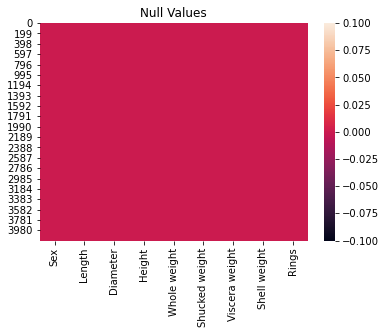

In [7]:
# plotting heatmap of null values to check null values
import seaborn as sns
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# from above analysis it is clear that no null values are present in dataset.

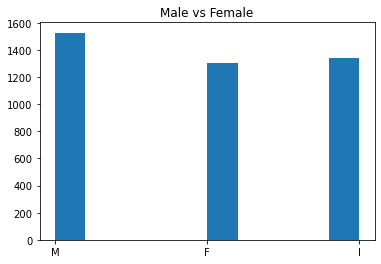

In [8]:
# checking for imbalance in dataset
df['Sex'].hist(grid=False)
plt.title('Male vs Female')
plt.show()

In [9]:
# count of classification data
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [10]:
# using encoding techniques to convert classification data to nominal
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df["Sex"])
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [11]:
# checking value assigned in encoding
LE.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [12]:
# checking correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


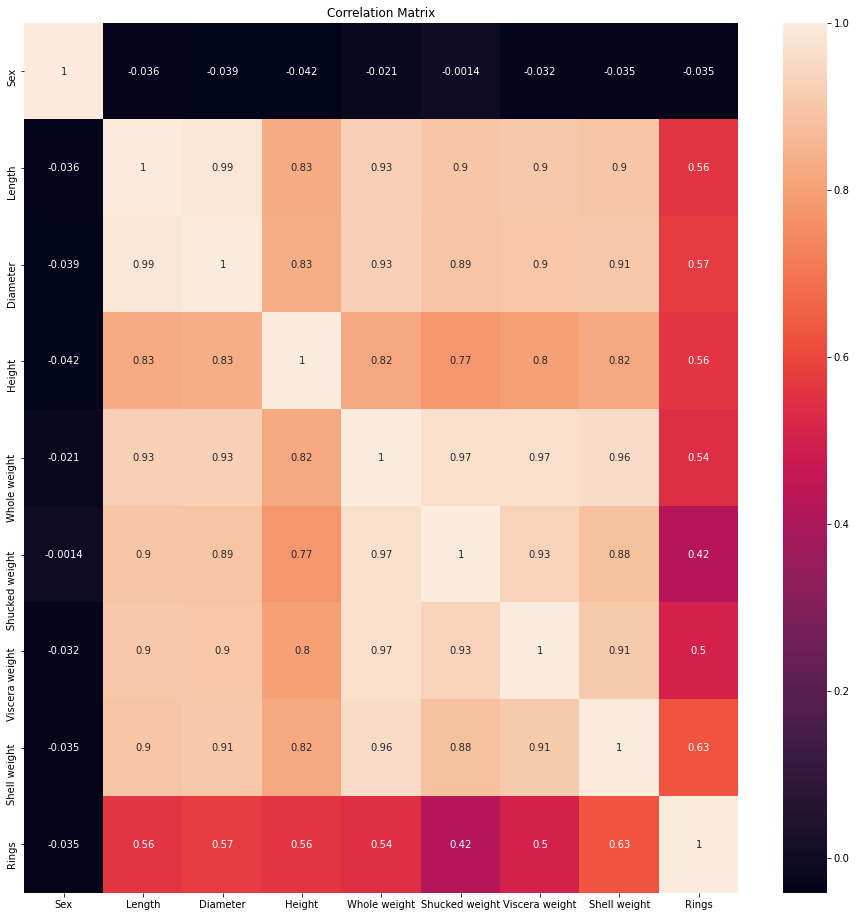

In [13]:
# plotting heatmap of correlation
corr_mat=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

 from above heatmap we can see that there is a strong relationship between all features with label

In [14]:
# printing correlation values of independant variable with target variable in sorted form
corr_matrix=df.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.001373
Whole weight     -0.021391
Viscera weight   -0.032067
Rings            -0.034627
Shell weight     -0.034854
Length           -0.036066
Diameter         -0.038874
Height           -0.042077
Name: Sex, dtype: float64

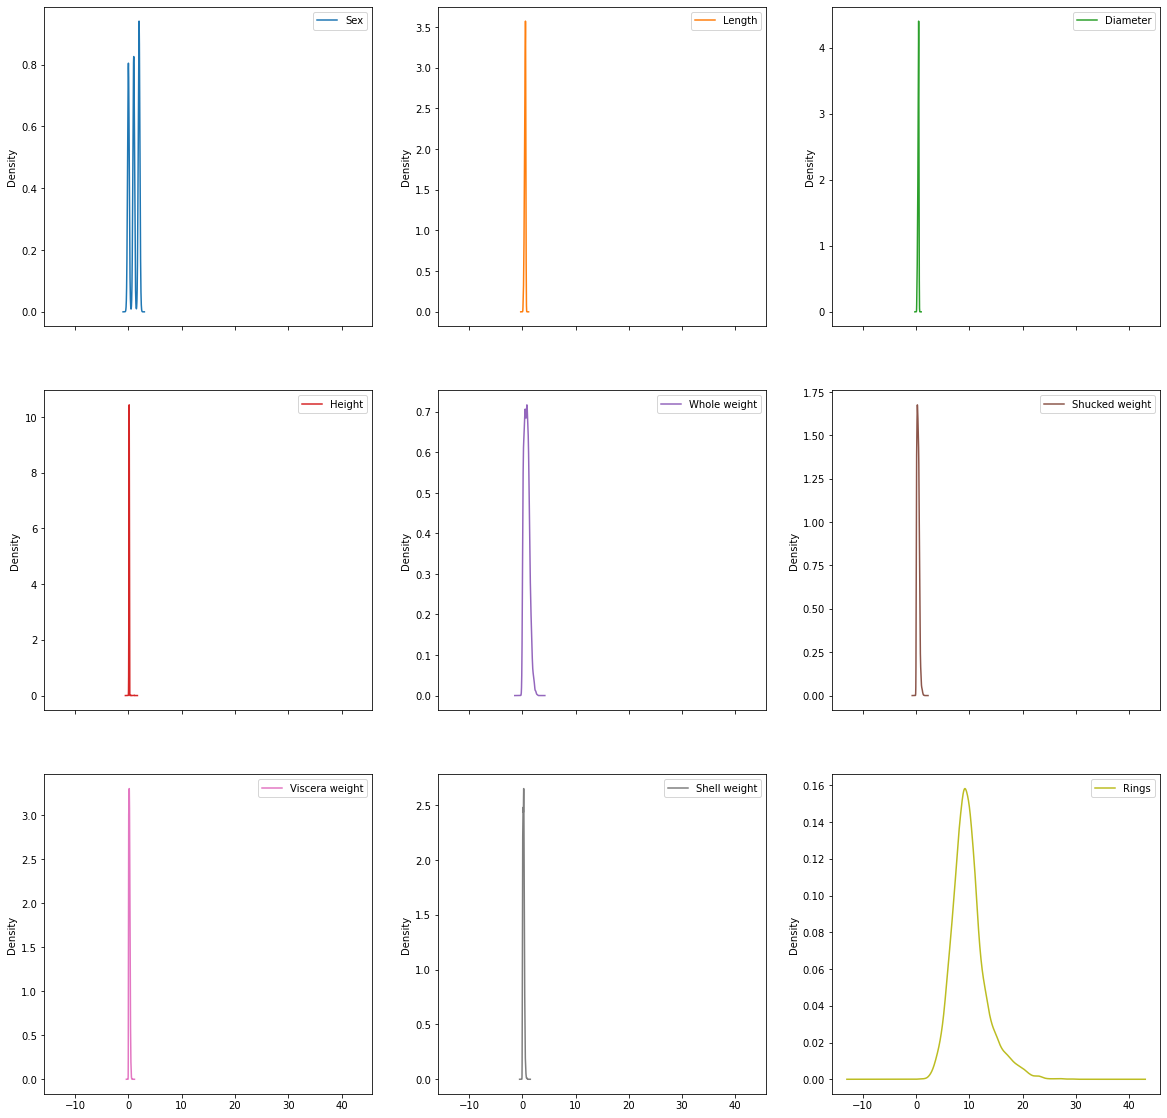

In [15]:
# data distribution 
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(20,20))
plt.show()

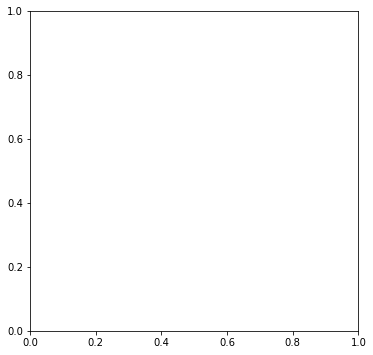

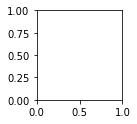

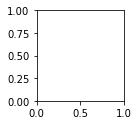

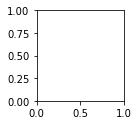

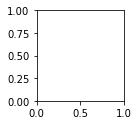

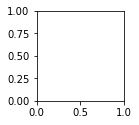

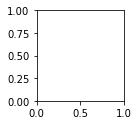

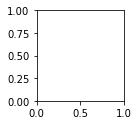

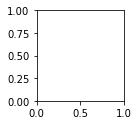

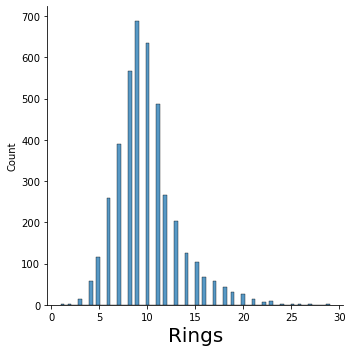

In [18]:
# data distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.displot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

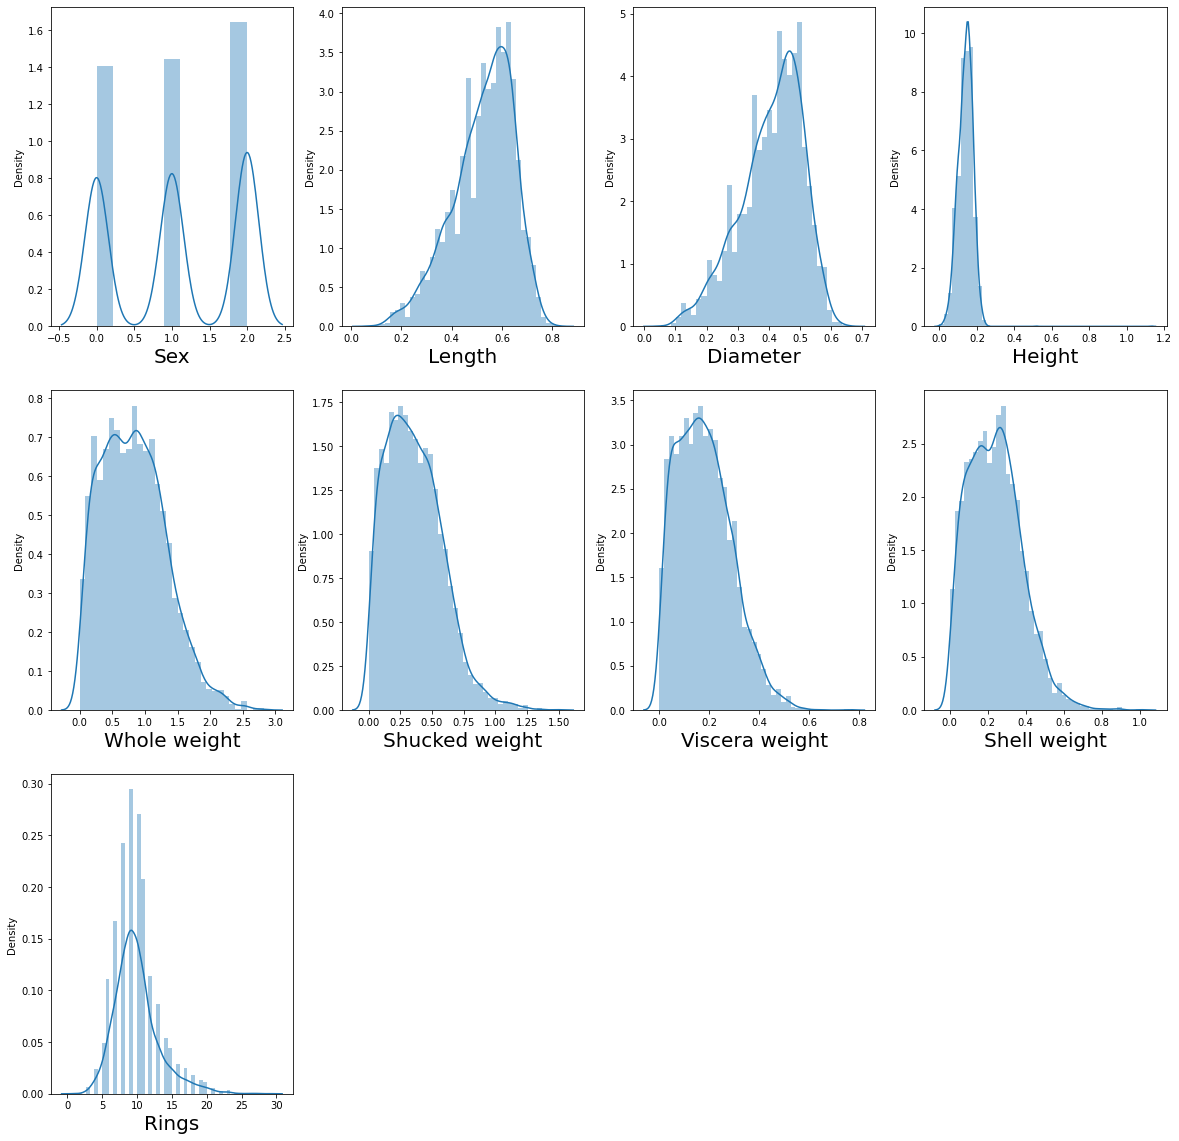

In [17]:
# checking data distribution
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

# from above distribution we can see there is a skewness in dataset

In [18]:
# split the data into features and label
x=df.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'